Move around directories

In [1]:
import os
os.chdir('/Volumes/Nondh\'s HDD/m12i_res7000_md/')

In [2]:
import gizmo_analysis as gizmo
import wutilities as ut
import rockstar_analysis as rockstar

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in particles at present day
part = gizmo.io.Read.read_snapshots(['star'], 'redshift', 0, assign_principal_axes=True,
                                 assign_orbit=True)


# in wutilities.simulation.Snapshot():
  reading:  snapshot_times.txt
  input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark.2    (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

  cannot find MUSIC config file: */*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle properties

* assigning center of galaxy/halo:
  position = (41792.147, 44131.235, 46267.679) [kpc comoving]
  ve

In [43]:
# read in halo catalogue at present day
hal = rockstar.io.IO.read_catalogs('redshift', 0)


# in wutilities.simulation.Snapshot():
  reading:  snapshot_times.txt
  input redshift = 0:  using snapshot index = 600, redshift = 0.000

* read 25109 halos from:  halo_600.hdf5
* read 25109 halos with star particles from:  star_600.hdf5



In [9]:
list(part['star'].keys())

['position',
 'mass',
 'massfraction',
 'id.child',
 'id.generation',
 'id',
 'potential',
 'form.scalefactor',
 'velocity',
 'host.distance',
 'host.distance.total',
 'host.distance.norm',
 'host.velocity',
 'host.velocity.total',
 'host.velocity.tan',
 'host.velocity.rad',
 'host.velocity.ratio',
 'host.velocity.norm']

In [39]:
# how many stars are there in total
len(part['star']['id'])

13976485

In [41]:
# read in indices of stars in the stream
st = np.loadtxt('../one-stream-ids.txt', dtype=int)
len(st)

1960

In [38]:
part['star']['position'][st]

array([[41783.51759699, 44119.12594841, 46230.99219849],
       [41781.60840905, 44117.49452204, 46232.40109432],
       [41786.78049642, 44116.25877781, 46232.5553281 ],
       ...,
       [41808.48050546, 44143.51437461, 46302.74794439],
       [41807.70845264, 44142.02957324, 46302.51956791],
       [41794.43296363, 44179.23146556, 46274.21574444]])

In [44]:
part['star']['host.distance'][st]

array([[ -8.62895659, -12.10864112, -36.68702365],
       [-10.53814453, -13.74006749, -35.27812782],
       [ -5.36605716, -14.97581171, -35.12389404],
       ...,
       [ 16.33395189,  12.27978508,  35.06872225],
       [ 15.56189907,  10.79498371,  34.84034576],
       [  2.28641005,  47.99687603,   6.53652229]])

Try plotting the positions of the stars in the stream and compared to Robyn's plots

In [79]:
# transform to principal axis frame
pos_pa = ut.coordinate.get_coordinates_rotated(part['star']['host.distance'][st],part.principal_axes_vectors)

Text(0, 0.5, 'y [kpc]')

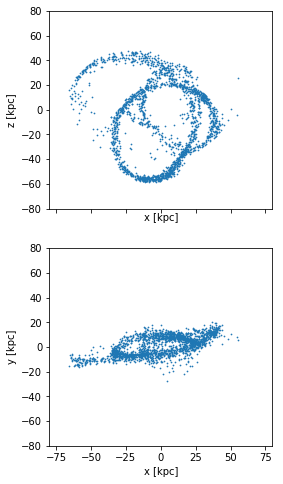

In [78]:
fig, ax = plt.subplots(2,figsize=(4,8),sharex=True)
ax[0].scatter(pos_pa[:,0], pos_pa[:,2], s=0.5)
ax[0].set_xlim((-80, 80))
ax[0].set_ylim((-80, 80))
ax[0].set_xlabel('x [kpc]')
ax[0].set_ylabel('z [kpc]')
ax[1].scatter(pos_pa[:,0], pos_pa[:,1], s=0.5)
ax[1].set_xlim((-80, 80))
ax[1].set_ylim((-80, 80))
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('y [kpc]')

![title](onestream.png)

In [133]:
list(hal.keys())

['accrete.rate',
 'accrete.rate.100Myr',
 'accrete.rate.tdyn',
 'am.phantom',
 'am.progenitor.main',
 'axis.b/a',
 'axis.c/a',
 'descendant.snapshot',
 'host.distance',
 'host.index',
 'host.velocity',
 'host.velocity.rad',
 'host.velocity.tan',
 'id',
 'infall.first.mass',
 'infall.first.snapshot',
 'infall.first.vel.circ.max',
 'infall.mass',
 'infall.snapshot',
 'infall.vel.circ.max',
 'major.merger.snapshot',
 'mass',
 'mass.180m',
 'mass.200c',
 'mass.200m',
 'mass.500c',
 'mass.bound',
 'mass.half.snapshot',
 'mass.lowres',
 'mass.peak',
 'mass.peak.snapshot',
 'mass.vir',
 'position',
 'position.offset',
 'progenitor.number',
 'radius',
 'scale.radius',
 'scale.radius.klypin',
 'spin.bullock',
 'spin.peebles',
 'tree.index',
 'vel.circ.max',
 'vel.circ.peak',
 'vel.std',
 'velocity',
 'velocity.offset',
 'lowres.mass.frac',
 'star.form.time.100',
 'star.form.time.50',
 'star.form.time.90',
 'star.form.time.95',
 'star.form.time.dif.68',
 'star.indices',
 'star.mass',
 'star.mass

In [81]:
hal['position']

array([[41919.72 , 42467.152, 46056.57 ],
       [41899.176, 42480.56 , 46036.496],
       [41898.164, 42490.344, 46032.867],
       ...,
       [41803.336, 44521.242, 46378.133],
       [41802.293, 44536.598, 46367.81 ],
       [41879.547, 44538.234, 46370.016]], dtype=float32)

In [82]:
pos_pa_hal = ut.coordinate.get_coordinates_rotated(hal['host.distance'],part.principal_axes_vectors)

In [84]:
len(pos_pa_hal)

25109

Try plotting to see the distribution of halos

Text(0, 0.5, 'y [kpc]')

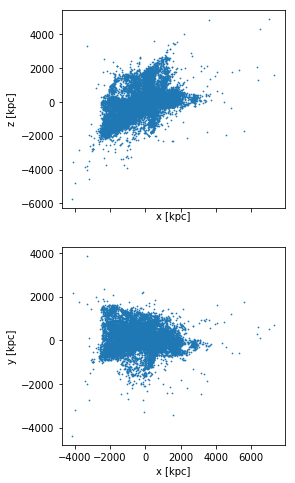

In [86]:
fig, ax = plt.subplots(2,figsize=(4,8),sharex=True)
ax[0].scatter(pos_pa_hal[:,0], pos_pa_hal[:,2], s=0.5)
#ax[0].set_xlim((-80, 80))
#ax[0].set_ylim((-80, 80))
ax[0].set_xlabel('x [kpc]')
ax[0].set_ylabel('z [kpc]')
ax[1].scatter(pos_pa_hal[:,0], pos_pa_hal[:,1], s=0.5)
#ax[1].set_xlim((-80, 80))
#ax[1].set_ylim((-80, 80))
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('y [kpc]')

Compute distances between halos and stars in the stream in the principal axes frame

In [92]:
# p_star = part['star']['host.distance'][st]
# p_hal = hal['host.distance']
hal['id']
# seems like halo id is the same as the index in the array

array([    0,     1,     2, ..., 25106, 25107, 25108], dtype=int32)

In [107]:
# find indices of halo that are within threshold [kpc] from the nearest star in the stream
def compute_dist(pos_pa_hal, pos_pa, threshold = 2):
    encounter = []
    dist_list = []
    for i in range(len(pos_pa_hal)):
        if np.absolute(pos_pa_hal[i,0]) > 80 or np.absolute(pos_pa_hal[i,1]) > 80 \
        or np.absolute(pos_pa_hal[i,2]) > 80:
            continue
        else:
            mindist = np.infty
            for j in range(len(pos_pa)):
                d_sq = (pos_pa_hal[i,0]-pos_pa[j,0])**2 + (pos_pa_hal[i,1]-pos_pa[j,1])**2 + \
                (pos_pa_hal[i,2]-pos_pa[j,2])**2
                if d_sq < mindist:
                    mindist = d_sq
            
            if mindist < threshold**2:
                encounter.append(i)
                dist_list.append(mindist)
    return np.array(encounter), np.sqrt(np.array(dist_list))
    

In [108]:
halo_indices, mindist_array = compute_dist(pos_pa_hal, pos_pa)

In [110]:
pos_pa_hal = pos_pa_hal[halo_indices]

Text(0, 0.5, 'y [kpc]')

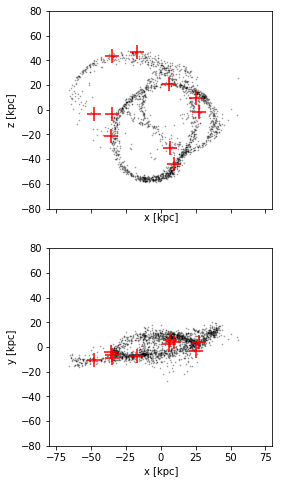

In [126]:
fig, ax = plt.subplots(2,figsize=(4,8),sharex=True)
ax[0].scatter(pos_pa[:,0], pos_pa[:,2], s=0.5, c='black', alpha=0.3)
ax[0].scatter(pos_pa_hal[:,0], pos_pa_hal[:,2], s=200, marker='+', c='red')
ax[0].set_xlim((-80, 80))
ax[0].set_ylim((-80, 80))
ax[0].set_xlabel('x [kpc]')
ax[0].set_ylabel('z [kpc]')
ax[1].scatter(pos_pa[:,0], pos_pa[:,1], s=0.5, c='black', alpha=0.3)
ax[1].scatter(pos_pa_hal[:,0], pos_pa_hal[:,1], s=200, marker='+', c='red')
ax[1].set_xlim((-80, 80))
ax[1].set_ylim((-80, 80))
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('y [kpc]')

In [115]:
# minimum distances in kpc
mindist_array

array([1.95158441, 1.23411376, 1.91949902, 1.09483226, 1.63215942,
       1.326971  , 1.29322373, 0.84551953, 1.46665974, 1.93575588])

In [127]:
# masses of the encountered halos in Msun
hal['mass'][halo_indices]

array([ 2920085.5 ,  2146011.5 , 38594016.  ,  5910399.  ,   492535.62,
        2603418.8 ,   633262.1 ,  1829344.8 ,   527720.8 , 35250710.  ],
      dtype=float32)